In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
eda = pickle.load(open("pickle/eda.pkl", "rb"))
null_hist = pickle.load(open("pickle/nulls.pkl", "rb"))
cat_features = pickle.load(open("pickle/cat_features.pkl", "rb"))

In [ ]:
pickle.dump(eda, open("pickle/eda.pkl", "wb"))
pickle.dump(null_hist, open("pickle/nulls.pkl", "wb"))
pickle.dump(cat_features, open("pickle/cat_features.pkl", "wb"))

# Feature Selection

During EDA, we saw that most of the candidate predictor variables contained  < 10% null values. We decided to remove the variables with > 10% null values; the bulk of the variables we are removing are > 90% null values.

In [61]:
test = pd.DataFrame(eda.isna().sum())

In [69]:
test.reset_index()

,index,0
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [75]:
df = test.rename(columns={0: "index", 1: "null_ct"}).reset_index()

In [76]:
df

,level_0,index
0,customer_ID,0
1,S_2,0
2,P_2,786
3,D_39,0
4,B_1,0
...,...,...
186,D_142,82728
187,D_143,1813
188,D_144,733
189,D_145,1813


In [79]:
# make dynamic, change divisor when bigger DS
df['null_pct'] = df['index']/100000 * 100

In [80]:
df

,level_0,index,null_pct
0,customer_ID,0,0.000
1,S_2,0,0.000
2,P_2,786,0.786
3,D_39,0,0.000
4,B_1,0,0.000
...,...,...,...
186,D_142,82728,82.728
187,D_143,1813,1.813
188,D_144,733,0.733
189,D_145,1813,1.813


In [84]:
fs_vars = df[df['null_pct'] > 10]

In [85]:
fs_vars

,level_0,index,null_pct
7,S_3,18626,18.626
10,D_42,85386,85.386
11,D_43,30195,30.195
17,D_46,21842,21.842
19,D_48,12915,12.915
20,D_49,89762,89.762
24,D_50,56328,56.328
31,D_53,73244,73.244
37,S_7,18626,18.626
41,D_56,54123,54.123


In [89]:
fsv = list(fs_vars['level_0'])
fsv

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_48',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'D_61',
 'D_62',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'D_77',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'S_27',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [91]:
# list of variables we do want
new_v = sorted([f for f in eda.columns if f not in fsv])
new_v

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_3',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_38',
 'B_4',
 'B_40',
 'B_41',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'D_102',
 'D_103',
 'D_104',
 'D_107',
 'D_109',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_133',
 'D_139',
 'D_140',
 'D_141',
 'D_143',
 'D_144',
 'D_145',
 'D_39',
 'D_41',
 'D_44',
 'D_45',
 'D_47',
 'D_51',
 'D_52',
 'D_54',
 'D_55',
 'D_58',
 'D_59',
 'D_60',
 'D_63',
 'D_64',
 'D_65',
 'D_68',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_74',
 'D_75',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_83',
 'D_84',
 'D_86',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'P_2',
 'P_3',
 'P_4',
 'R_1',
 'R_10',
 'R_11',


In [92]:
fs = eda[new_v].copy()

In [93]:
fs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,customer_ID,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,0


In [94]:
null_test = fs.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

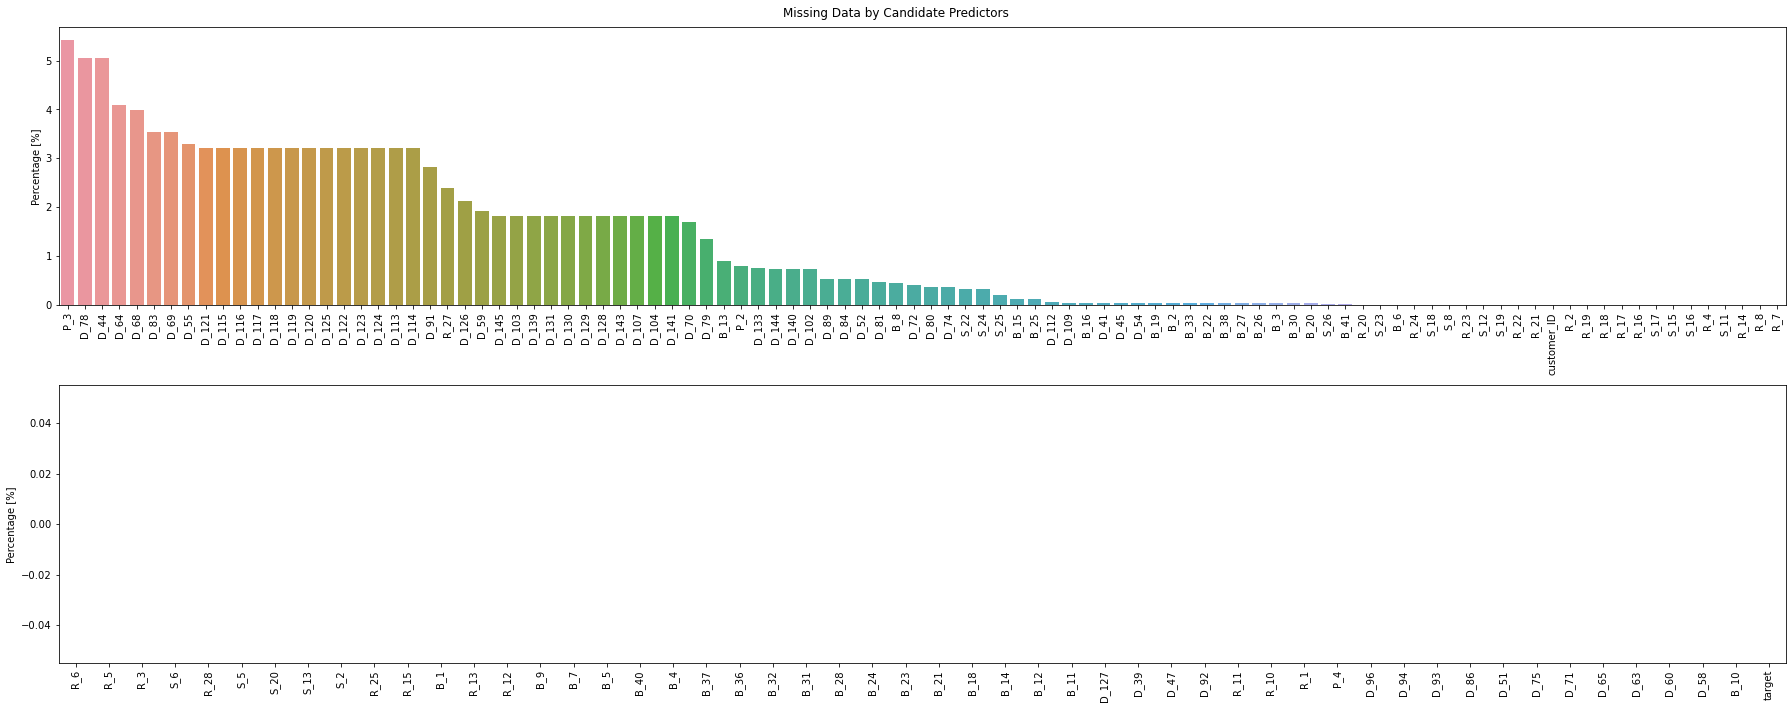

In [95]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_test[:100].index, y=null_test[:100].values, ax=ax[0])
sns.barplot(x=null_test[100:].index, y=null_test[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_test1.png', dpi=425, bbox_inches='tight')
plt.show()

In [96]:
pickle.dump(fs, open("pickle/fs_df.pkl", "wb"))

In [ ]:
fs = pickle.load(open("pickle/fs_df.pkl", "rb"))

## Categorical Features

In order to use Scikitlearn PCA, we will drop the categorical variables as well as `S_2`, which is a date/time variable. these will be evaluated separately.

In [109]:
cat_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [110]:
fs_new = sorted([f for f in fs.columns if f not in cat_features + ['customer_ID','S_2']])
fs_new

['B_1',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_18',
 'B_19',
 'B_2',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_3',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_4',
 'B_40',
 'B_41',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'D_102',
 'D_103',
 'D_104',
 'D_107',
 'D_109',
 'D_112',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_133',
 'D_139',
 'D_140',
 'D_141',
 'D_143',
 'D_144',
 'D_145',
 'D_39',
 'D_41',
 'D_44',
 'D_45',
 'D_47',
 'D_51',
 'D_52',
 'D_54',
 'D_55',
 'D_58',
 'D_59',
 'D_60',
 'D_65',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_74',
 'D_75',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_83',
 'D_84',
 'D_86',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'P_2',
 'P_3',
 'P_4',
 'R_1',
 'R_10',
 'R_11',
 'R_12',
 'R_13',
 'R_14',
 'R_15',
 'R_16',
 'R_17',
 'R_18',
 'R_19',
 'R_2',
 'R_20',
 'R_21

In [111]:
fs2 = fs[fs_new].copy()

In [112]:
fs2
# this is what we will use for stepwise selection after imputing NaNs

,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_18,B_19,...,S_20,S_22,S_23,S_24,S_25,S_26,S_5,S_6,S_8,target
0,0.008724,0.096219,0.002768,0.148266,0.118075,0.018385,0.016361,0.007665,0.652984,0.008520,...,0.009705,0.894090,0.135561,0.911191,0.974539,0.001243,0.023381,0.008322,0.922998,0
1,0.004923,0.099804,0.002749,0.143530,0.118737,0.013035,0.017688,0.007148,0.647093,0.002238,...,0.009924,0.902135,0.136333,0.919876,0.975624,0.004561,0.030599,0.002482,0.919414,0
2,0.021655,0.134073,0.010077,0.137014,0.114534,0.056653,0.063955,0.003636,0.645819,0.000408,...,0.008446,0.939654,0.134938,0.958699,0.974067,0.011736,0.048367,0.000530,1.001977,0
3,0.013683,0.134437,0.009667,0.129017,0.120740,0.012498,0.022732,0.005896,0.654358,0.005897,...,0.006614,0.913205,0.140058,0.926341,0.975499,0.007571,0.030063,0.000783,0.704016,0
4,0.015193,0.121518,0.009484,0.129539,0.095178,0.027897,0.031171,0.001714,0.650112,0.007773,...,0.005511,0.921026,0.131620,0.933479,0.978027,0.018200,0.054221,0.006698,0.917133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.597829,0.018762,0.568745,0.019354,0.008020,0.208935,0.003641,1.007979,0.058000,0.832152,...,0.002984,0.927312,0.136109,0.934297,0.973335,0.008895,0.003671,1.003519,0.664955,0
99996,0.675999,0.008919,0.644104,0.015428,0.036452,0.205724,0.004038,1.002550,0.052252,0.915952,...,0.002146,0.927598,0.139274,0.934902,0.975162,0.003994,0.004589,0.009121,0.004212,0
99997,0.645728,0.018506,0.621671,0.015932,0.029023,0.202970,0.007950,1.006372,0.060085,1.003033,...,0.002412,0.923396,0.137267,0.932529,0.972051,0.005734,0.005730,0.009046,0.007804,0
99998,0.008019,0.016049,0.000656,0.009107,0.007334,0.004305,0.001346,0.172072,0.585668,0.007399,...,0.006557,0.296741,0.135450,0.080604,0.969829,0.001976,0.001485,1.009798,0.009353,0


In [124]:
fs2.to_csv('data/fs2.csv')

In [163]:
pickle.dump(fs2, open('data/fs2.pkl', 'wb'))
# fs2 = pickle.load(open('data/fs2.pkl', 'rb'))

In [140]:
ss = fs2.fillna(fs2.mean())

In [162]:
pickle.dump(ss, open('data/ss_imputed.pkl', 'wb'))
# ss = pickle.load(open('data/ss_imputed.pkl', 'rb'))

In [145]:
np.any(np.isnan(ss))

False

In [146]:
np.all(np.isfinite(ss))

True

# Low Risk Goal: Stepwise Selection Model

In [101]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

In [141]:
# prepare the df
X = ss.values
X.shape

(100000, 140)

In [142]:
# scale the data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [143]:
# transform the data for PCA()
X_scaled = scaler.transform(ss.values)

In [144]:
# fit the PCA
pca = PCA().fit(ss)

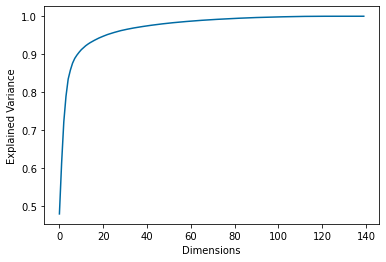

In [161]:
# plot the cumulative variance
cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.savefig('figs/cumulative_variance.png', dpi=425, bbox_inches='tight')
plt.show()

In [149]:
# find the elbow
pca2 = PCA(n_components = 0.95)
x_reduced = pca2.fit_transform(ss.values)
x_reduced.shape

(100000, 23)

Here we see that 23 variables account for 95% of the variation in the data. Therefore, when we do feature selection, we will choose `k=23`.

In [156]:
data = ss.copy()

X = data.iloc[:,0:138]  #independent columns
y = data.iloc[:,-1]    #target column 


#apply SelectKBest class to extract top 23 best features
bestfeatures = SelectKBest(k=23) # removed param 'score_func=chi2,' due to negative values in the ds
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(23,'Score'))  #print 23 best features

   Specs         Score
93   P_2  59365.810637
33   B_9  29778.048588
8   B_18  29631.108849
10   B_2  27456.940054
63  D_44  26035.309480
69  D_55  25573.467028
79  D_75  25549.993158
70  D_58  24347.252963
23  B_33  23946.462997
78  D_74  20735.053988
31   B_7  20320.831893
20   B_3  20119.514664
14  B_23  19530.237242
26   B_4  18560.260921
7   B_16  16561.440436
0    B_1  16050.781462
25  B_37  15656.549636
9   B_19  15408.353111
96   R_1  15263.559144
11  B_20  14793.240020
13  B_22  14432.098017
2   B_11  14230.835631
32   B_8  11376.017450


We can also visualize this:

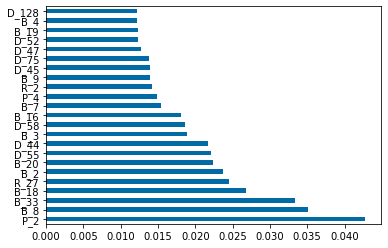

In [160]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.savefig('figs/tree_classifier_visualization_ss.png', dpi=425, bbox_inches='tight')
plt.show()

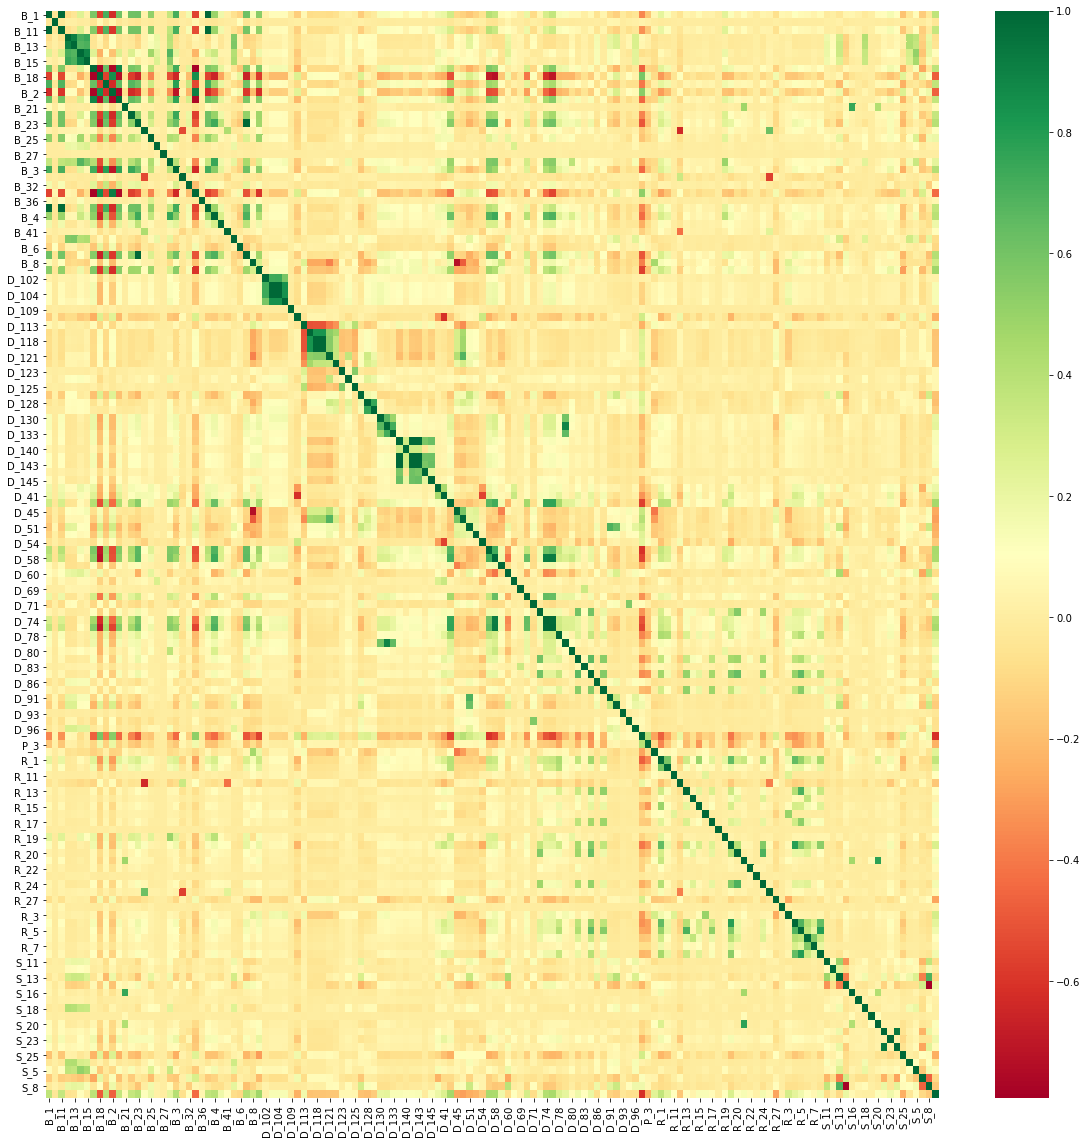

In [159]:
# heat map

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('figs/heat_map2.png', dpi=425, bbox_inches='tight')